In [1]:
%pylab inline
import sklearn
from scipy import stats

plt.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


## 3.1 决策树

决策树就是一个树状的决策图。

树中的每一个节点表示对象属性的判断条件，其分支表示符合节点条件的对象。

树的叶子节点表示对象所属的预测结果。

下面举贷款公司的一个决策树作例子。

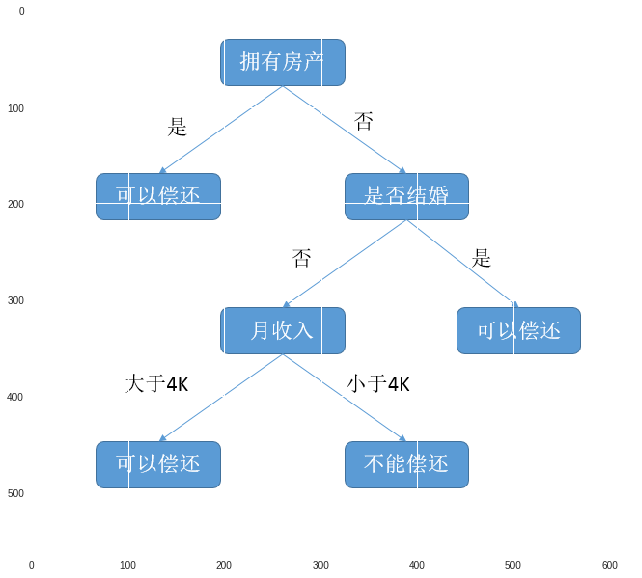

In [3]:
image = plt.imread('./dt1.png')
fig, ax = subplots(figsize=(20, 10))
plt.imshow(image, )

# 如何建立决策树：特征选择与信息熵

如何**根据已有的样本数据建立一棵决策树**？

首先介绍**特征选择**～

要按照某种特征对数据进行分类——那么，应当选择哪个特征呢？。。。。这里，介绍下信息熵的概念。

对某个随机变量，其信息熵定义为：

$H = -\sum_{i=1}^5 p_i \log p_i$

信息熵表示的是不确定度。可以证明，**均匀分布时，不确定度最大，此时信息熵达到最大**。

### 信息熵举例

例： 假设变量 x 的可能取值为 1, 2

如果 x 取 1 的概率为 100%，那么

$p_1 = 1,\ p_2 = 0;$

所以有

$H = 1*\log1 + 0*\log0= 0$

同理，如果 x 确定一定以及肯定只能取 2 ，信息熵也是0.

如果概率是一半一半，信息熵为

$H = - \log 0.5 \sim 0.7$ 

达到最大。

下面是演示图。

下图展示，无序分布的信息熵最大。


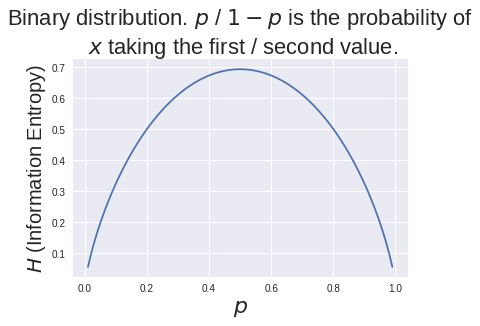

In [3]:
print('下图展示，无序分布的信息熵最大。')
ax = gca()
ps = np.linspace(0.01, 0.99, 100)
Hs = [ -(p*log(p) + (1-p)*log(1-p)) for p in ps  ]
ax.plot(ps, Hs)
ax.set_xlabel('$p$', fontsize=22)
ax.set_ylabel('$H$ (Information Entropy)', fontsize=20)
ax.set_title('Binary distribution. $p$ / $1-p$ is the probability of\n $x$ taking the first / second value.', 
             fontsize=22);

### 条件熵

下面就是好玩的了。

假设有数据集 $D$, 有某个特征 $A$。我们可以按照 $A$ 的取值对 $D$ 分类：

$D | A=A_1$, $D| A=A_2$, ...

这些分类的信息熵之和定义为 **条件熵**

$H(D|A) = p_{A=A_1} H(D|A=A_1) + p_{A=A_2} H(D|A=A_2) + ...$

### 信息增益

条件熵与原数据集熵之间的差异称为 **特征A对数据集D的信息增益**（也称为**互信息**）

$g(D|A) = H(D) - H(D|A)$


**如果某个特征具有较大的信息增益，代表这个特征分类后使得D的分布的不确定性减小（** ***换言之，分类后D的分布一下变得很规则*** **）。那么优先按照这个特征分类。**

### ID3 生成算法

生成决策树最经典算法称为 ID3 生成算法 

(Iterative Dichotomiser 3，迭代二叉树3代，是Ross Quinlan发明的一种决策树算法)

具体方法：

    从根结点开始，对结点计算所有可能的特征的信息增益;
    
    选择信息增益最大的特征作为结点的特征，由该特征的不同取值建立子节点;
    
    对子节点递归地调用以上方法；
    
    直到 所有特征的信息增益都很小或者没有特征可以选择
### 下面用 sklearn 实现

In [4]:
from sklearn import tree
from sklearn import datasets

### 生成随机样本进行学习

    make_blobs: 生成 “成团的高斯分布的点，分布在五个中心周围”

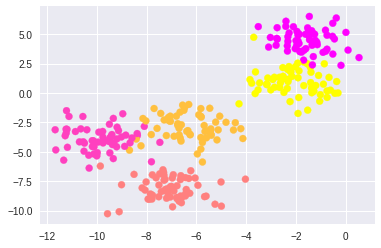

In [5]:
X, y = datasets.make_blobs(n_samples=300, centers=5, n_features=2, random_state=1)

ax = gca()
ax.scatter(X[:,0], X[:,1], c=y, cmap = 'spring')

### 训练决策树

In [6]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
clf.score(X,y)

1.0

### 交叉检验

In [7]:
from sklearn import model_selection

model_selection.cross_val_score(clf, X, y, cv = 5)

array([0.93333333, 0.98333333, 0.91666667, 0.96666667, 0.93333333])

### 看一下决策树的 Decision Surface?

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9266666666666667 	 [0.93 0.91 0.94]


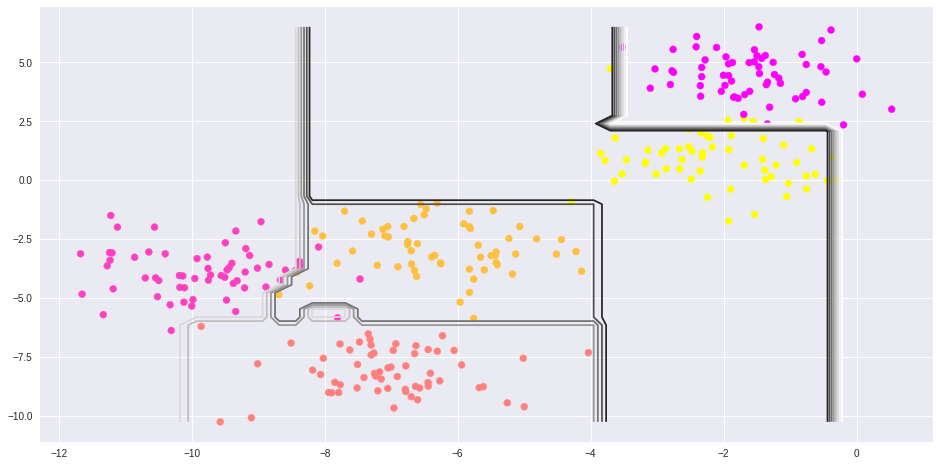

In [14]:
def ml_plot(X, y, clf, ngrid=50, title=''):

    fig, ax = subplots(figsize=(16,8))
    ax.scatter(X[:,0], X[:,1], c=y, cmap = 'spring')

    clf.fit(X,y)
    scores = model_selection.cross_val_score(clf, X, y)
    print('Evaluation result:\n\t', mean(scores), '\t', scores)

    x = np.linspace(min(X[:,0]), max(X[:,0]), ngrid)
    y = np.linspace(min(X[:,1]), max(X[:,1]), ngrid)
    yy, xx = np.meshgrid(y, x)
    P = np.zeros_like(xx)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.predict([[xi, yj]])
    # plot the margins
    ax.contour(xx, yy, P, )
    
    if title != '':
        ax.set_title(title, fontsize=14)
    plt.show()
    
ml_plot(X, y, clf)

# 决策树的优缺点

#### 优点：

一、 易于理解和解释。人们有能力去理解决策树的意义。

二、 数据的准备往往是简单或者是不必要的（其他的技术往往要求先把数据一般化，比如去掉多余的或者空白的属性）

三、 能够同时处理数据型和常规型属性（其他的技术往往要求数据属性的单一）

四、 是一个“白盒模型”（如果给定一个观察的模型，那么根据所产生的决策树很容易推出相应的逻辑表达式）

五、 在相对短的时间内能够对大型数据源做出可行且效果良好的结果。同时它的大小独立于数据库的大小。

#### 缺点：

一、 对于那些各类别样本数量不一致的数据，在决策树当中,信息增益的结果偏向于那些具有更多数值的特征。

二、 决策树处理缺失数据时的困难。

三、 过度拟合问题的出现（一棵过于复杂的决策树很可能出现过拟合的情况，因此需要对决策树进行优化，例如 **剪枝**

四、 忽略数据集中属性之间的相关性。

# 作业：

1. 测试目前学到的 Classifier 的 performance。

    对以下几种模型：
        logestic 回归
        linear SVC
        rbf SVC
        决策树
        n_neighbor = 3, 5 的 knn
        单层 100, 200 个 neuron 的 neural_network
        
    
    测试它们以下数据集的表现：
        iris 
        digits
        500 个点  make_circles （建议 factor=0.5, noise=0.2)
        500 个点  make_blob (建议 n_samples=500, centers = 3, cluster_std=2)
        500 个点  make_moons (生成月牙状区域，建议n_samples=500, noise=0.1)
        
    请做到：
    
        打印 model_selection.cross_val_score() 结果
        
        把 validation 的结果作图，形象地演示（如，横坐表示不同的模型，纵坐标为 score）
        
        对后面两个数据集，绘制 决策边界 图

In [12]:
from sklearn.svm import SVC
from sklearn import model_selection, datasets, metrics, linear_model
from sklearn import neural_network
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes

In [14]:
def ml_plot(X, y, clf, ngrid=50, title=''):

    fig, ax = subplots()
    ax.scatter(X[:,0], X[:,1], c=y, cmap = 'spring')

    clf.fit(X,y)
    scores = model_selection.cross_val_score(clf, X, y)
    print('Evaluation result:\n\t', mean(scores), '\t', scores)

    x = np.linspace(min(X[:,0]), max(X[:,0]), ngrid)
    y = np.linspace(min(X[:,0]), max(X[:,0]), ngrid)
    yy, xx = np.meshgrid(y, x)
    P = np.zeros_like(xx)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.predict([[xi, yj]])
    # plot the margins
    ax.contour(xx, yy, P,) #colors='k',
               #levels=[-1, 0, 1], alpha=0.5,
               #linestyles=['--', '-', '--'])
    
    if title != '':
        ax.set_title(title, fontsize=14)
    plt.show()

def ml_clf_compare(X,y, title='', printinfo=True, cv=5):
    rlts = []
    labels = []
    
    for clf, label in [  
        
            [linear_model.LogisticRegressionCV(), 'logistic reg'],
            #[naive_bayes.GaussianNB(), 'naieve bayes'],
            [SVC(kernel='rbf'),  'rbf svm'],
            [SVC(kernel='linear'), 'linear svm'],
            [tree.DecisionTreeClassifier(), 'decision tree'],
            #[ensemble.RandomForestClassifier(), 'random forest'],
            #[ensemble.AdaBoostClassifier(learning_rate=1.5), 'AdaBoost'],
            #[ensemble.GradientBoostingClassifier(), 'Gradient Boosting \n Decision Tree (GBDT)'],
            [neural_network.MLPClassifier(hidden_layer_sizes=(200,)), 'neural network\n(200 neurons)'],
            [neighbors.KNeighborsClassifier(n_neighbors=5), 'knn (5 neighbors)'],
        ]:
    
        rlt = model_selection.cross_val_score(clf, X, y, cv=cv)
        rlts.append([xx for xx in rlt]); labels.append(label)
        if len(X[0]) == 2:
            ml_plot(X, y, clf, ngrid=50, title=label)
    
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(111)
    for i, rlt in enumerate(rlts):
        xs, ys = [i+row*0.05 for row in range(len(rlt))], rlt
        ax.scatter(xs, ys, label = labels[i])
        if printinfo: print(labels[i], '\n\t', mean(rlt), '\t', rlt)
    ax.set_xticks(range(len(rlts)))
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylabel('accuracy score', fontsize=22)
    fig.suptitle(title, fontsize=24)
    plt.show()

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: Fu

Evaluation result:
	 0.46199082042455536 	 [0.46428571 0.46987952 0.45180723]


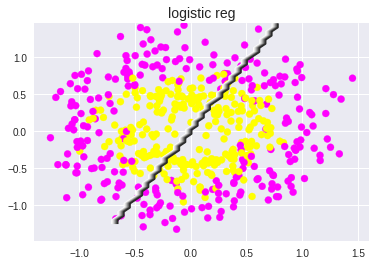

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli

Evaluation result:
	 0.8941241155096576 	 [0.86309524 0.92168675 0.89759036]


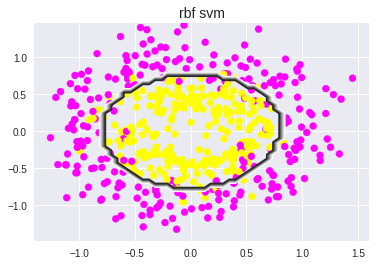

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.5019124115509658 	 [0.52380952 0.52409639 0.45783133]


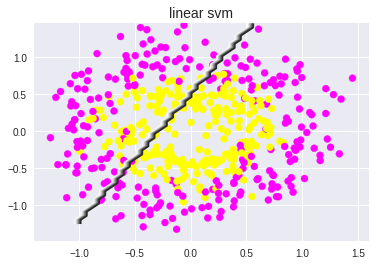

Evaluation result:
	 0.8420587110346146 	 [0.82738095 0.84337349 0.85542169]


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


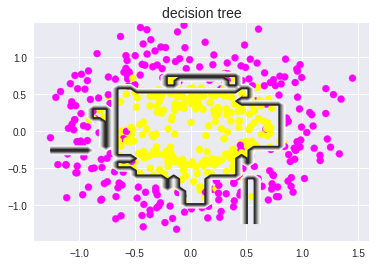

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

Evaluation result:
	 0.8861158921399884 	 [0.85714286 0.91566265 0.88554217]


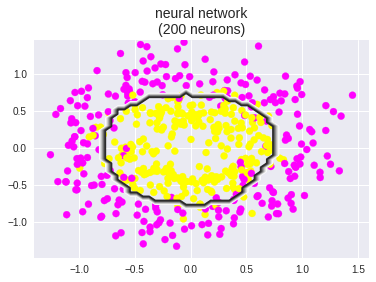

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.866059475999235 	 [0.85119048 0.84939759 0.89759036]


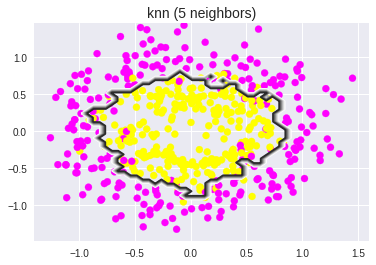

logistic reg 
	 0.43200000000000005 	 [0.42, 0.42, 0.45, 0.38, 0.49]
rbf svm 
	 0.892 	 [0.85, 0.86, 0.94, 0.9, 0.91]
linear svm 
	 0.502 	 [0.5, 0.48, 0.52, 0.44, 0.57]
decision tree 
	 0.8400000000000001 	 [0.81, 0.85, 0.83, 0.87, 0.84]
neural network
(200 neurons) 
	 0.8720000000000001 	 [0.82, 0.86, 0.91, 0.87, 0.9]
knn (5 neighbors) 
	 0.868 	 [0.83, 0.86, 0.84, 0.91, 0.9]


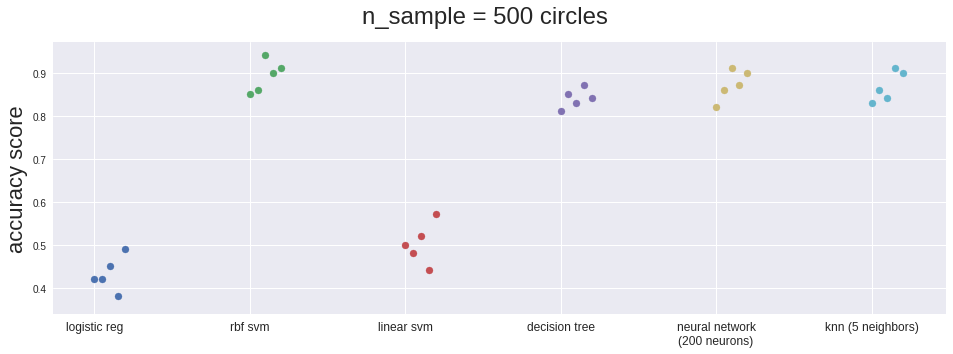

In [15]:
X, y = datasets.make_circles(n_samples=500, factor=.5, noise=.2)

ml_clf_compare(X, y, 'n_sample = 500 circles')

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on t

logistic reg 
	 0.9399999999999998 	 [0.9, 0.9666666666666667, 0.9333333333333333, 0.9, 1.0]
rbf svm 
	 0.9800000000000001 	 [0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0]
linear svm 
	 0.9800000000000001 	 [0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0]
decision tree 
	 0.9600000000000002 	 [0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 1.0]
neural network
(200 neurons) 
	 0.9800000000000001 	 [1.0, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0]
knn (5 neighbors) 
	 0.9733333333333334 	 [0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0]


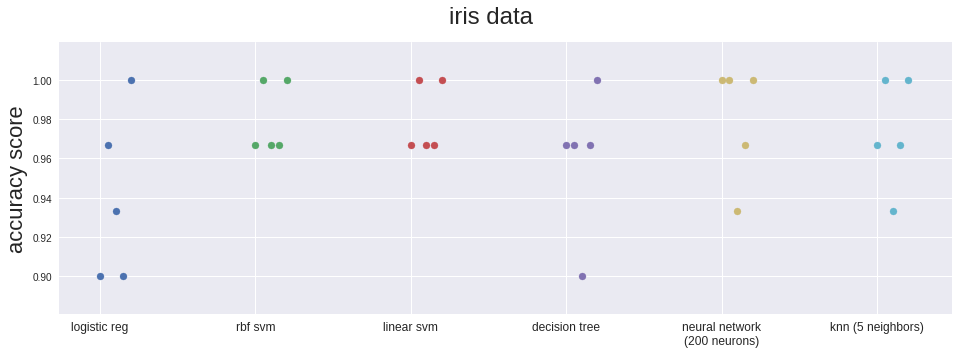

In [16]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
ml_clf_compare(X, y, 'iris data', True)

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWar

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklea

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/ho

logistic reg 
	 0.9299288279424083 	 [0.9313186813186813, 0.8977900552486188, 0.9442896935933147, 0.9663865546218487, 0.9098591549295775]
rbf svm 
	 0.44878680061604637 	 [0.4340659340659341, 0.4088397790055249, 0.415041782729805, 0.48739495798319327, 0.49859154929577465]
linear svm 
	 0.9493348726211526 	 [0.9642857142857143, 0.9226519337016574, 0.9665738161559888, 0.9635854341736695, 0.9295774647887324]
decision tree 
	 0.7782030475098951 	 [0.7884615384615384, 0.6823204419889503, 0.7827298050139275, 0.8431372549019608, 0.7943661971830986]
neural network
(200 neurons) 
	 0.9449383613145109 	 [0.9642857142857143, 0.8977900552486188, 0.9554317548746518, 0.9747899159663865, 0.9323943661971831]
knn (5 neighbors) 
	 0.9627899114966898 	 [0.9478021978021978, 0.9558011049723757, 0.9665738161559888, 0.9803921568627451, 0.9633802816901409]


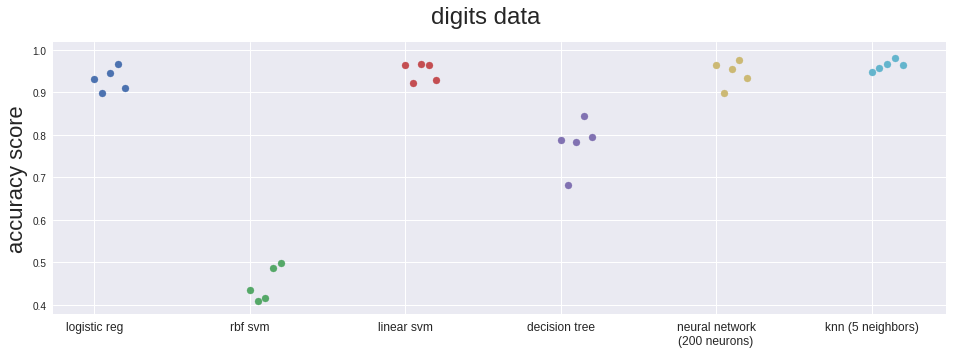

In [17]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
ml_clf_compare(X, y, 'digits data')

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on t

Evaluation result:
	 1.0 	 [1. 1. 1.]


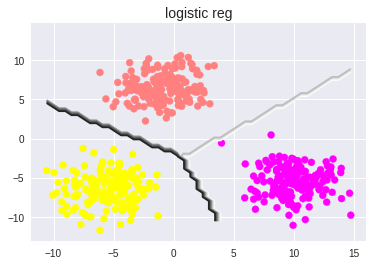

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli

Evaluation result:
	 0.9959595959595959 	 [1.         1.         0.98787879]


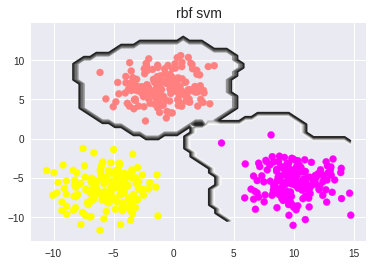

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 1.0 	 [1. 1. 1.]


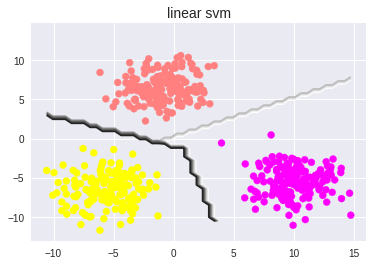

Evaluation result:
	 0.9979797979797981 	 [1.         1.         0.99393939]


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


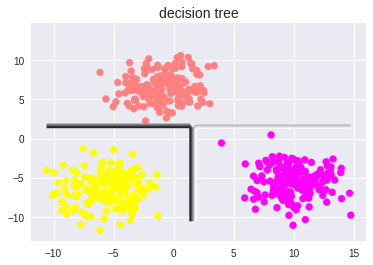

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 1.0 	 [1. 1. 1.]


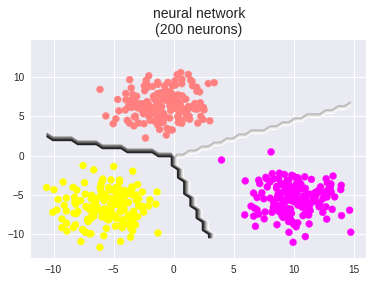

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 1.0 	 [1. 1. 1.]


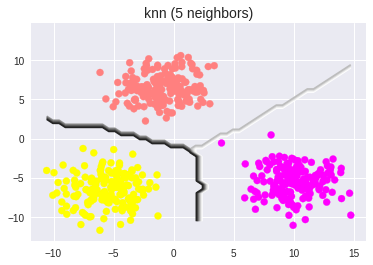

logistic reg 
	 1.0 	 [1.0, 1.0, 1.0, 1.0, 1.0]
rbf svm 
	 0.9959595959595958 	 [1.0, 1.0, 1.0, 0.9797979797979798, 1.0]
linear svm 
	 1.0 	 [1.0, 1.0, 1.0, 1.0, 1.0]
decision tree 
	 0.997979797979798 	 [1.0, 1.0, 1.0, 0.98989898989899, 1.0]
neural network
(200 neurons) 
	 1.0 	 [1.0, 1.0, 1.0, 1.0, 1.0]
knn (5 neighbors) 
	 1.0 	 [1.0, 1.0, 1.0, 1.0, 1.0]


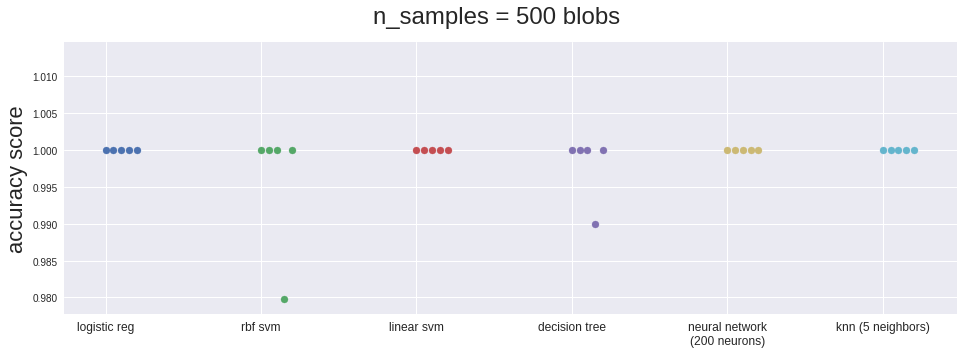

In [18]:
X, y = datasets.make_blobs(n_samples=500, centers = 3, cluster_std=2)

ml_clf_compare(X, y, 'n_samples = 500 blobs')

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: Fu

Evaluation result:
	 0.8760518263530312 	 [0.86309524 0.89759036 0.86746988]


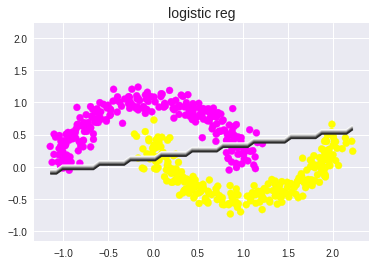

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli

Evaluation result:
	 0.9919917766303308 	 [0.99404762 0.98795181 0.9939759 ]


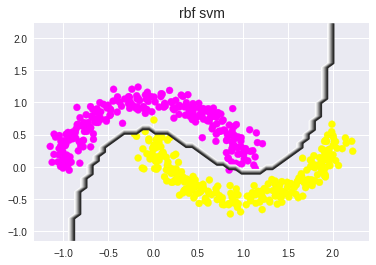

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.8640753490151081 	 [0.8452381  0.89759036 0.84939759]


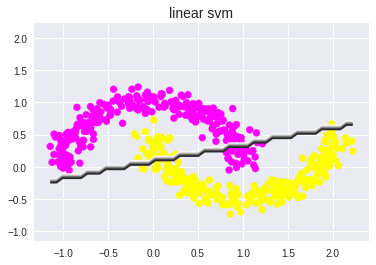

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9839357429718877 	 [1.         0.97590361 0.97590361]


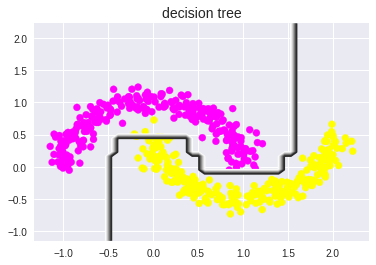

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

Evaluation result:
	 0.9260852935551731 	 [0.9047619  0.94578313 0.92771084]


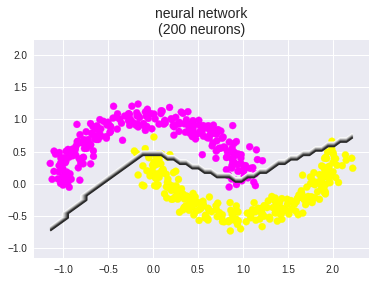

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9979919678714859 	 [1.        1.        0.9939759]


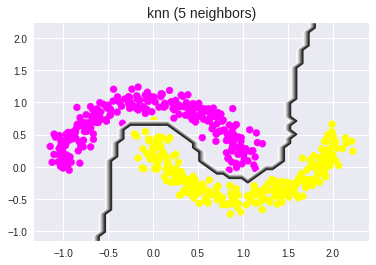

logistic reg 
	 0.8779999999999999 	 [0.85, 0.83, 0.92, 0.94, 0.85]
rbf svm 
	 0.994 	 [1.0, 0.98, 1.0, 0.99, 1.0]
linear svm 
	 0.868 	 [0.84, 0.82, 0.93, 0.92, 0.83]
decision tree 
	 0.9899999999999999 	 [1.0, 0.98, 0.99, 0.98, 1.0]
neural network
(200 neurons) 
	 0.9199999999999999 	 [0.91, 0.84, 0.98, 0.96, 0.91]
knn (5 neighbors) 
	 0.998 	 [1.0, 1.0, 1.0, 0.99, 1.0]


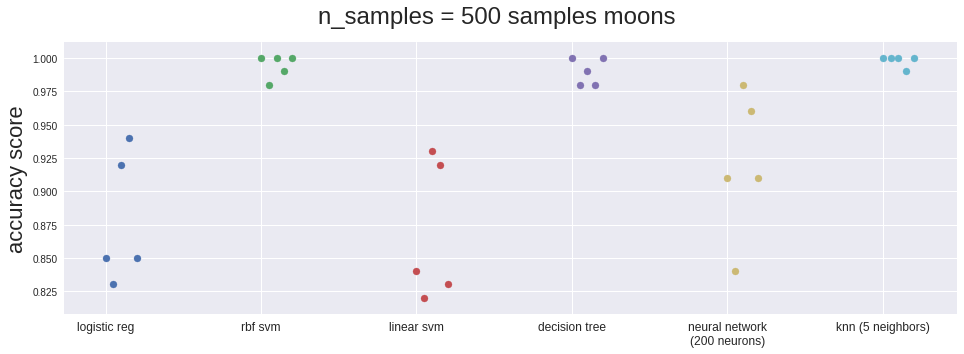

In [19]:
X, y = datasets.make_moons(500, noise=0.1)

ml_clf_compare(X, y, 'n_samples = 500 samples moons')